Antes de começar este notebook:

- Opcional: Leia e faça os exercícios sobre Python [aqui](Básico%20-%20Python.ipynb);

- Entenda o funcionamento da biblioteca Pandas [aqui](Básico%20-%20Pandas.ipynb);

- Implemente o código no arquivo `ganho_informacao.py` de acordo com as instruções comentadas. Faça na ordem das funçoes que estiverem lá. Para cada função implementada, rode o teste unitário para verificar se a mesma está funcionando. A maioria das funções possuem teste unitário correpondente, verifique em `tests.py`. Por exemplo, para rodar o teste da função `entropia`, execute:
```
python3 -m tests TestInfoGain.test_entropia
```
em que `tests` é o nome do arquivo de testes e `TestInfoGain.test_entropia` é a classe/método a ser testado.

- Caso queira, você também pode usar esse notebook para testar. Para isso, comente a importação do módulo `ganho_informacao` e copie a função aqui no notebook para testà-la e, quando tiver funcionando, copie e cole ela de volta no arquivo `ganho_informação.py`;

- **Atenção:** após rodar o comando de import neste notebook, caso precise mudar algo no código `ganho_informacao.py` e visualizar o resultado aqui, você deverá reiniciar o kernel.



Importação das bibliotecas necessárias. Sempre que quiser acessar alguma função/classe do pandas use, por exemplo: pd.DataFrame()

In [3]:
import numpy as np
import pandas as pd
import math
from ganho_informacao import entropia,ganho_informacao
import matplotlib.pyplot as plt

In [4]:
pd.DataFrame({"col1":["a","b","c"]})

,col1
0,a
1,b
2,c


Faça um DataFrame do exemplo dado na aula sobre Ganho de Informação (sobre a renda e o crédito aprovado). Logo após, calcule a entropia e o ganho de informação do atributo Renda. Confira os resultados com os slides.

In [5]:
## Seu código aqui - Criação do DataFrame 

creditos = pd.DataFrame({'Renda':['alta', 'alta', 'alta', 'baixa', 'alta', 'baixa','baixa','baixa'],
                       'Crédito Aprovado': [True,True,True, False,False,False,False,False]
                        })
creditos

,Renda,Crédito Aprovado
0,alta,True
1,alta,True
2,alta,True
3,baixa,False
4,alta,False
5,baixa,False
6,baixa,False
7,baixa,False


In [6]:
def ganho_informacao(df_dados,nom_col_classe,nom_atributo):
   
    num_total = len(df_dados)
    info_gain = 0
    ser_count_col = df_dados[nom_atributo].value_counts()
    for val,count_atr in ser_count_col.iteritems():
        
        media =(count_atr/(num_total))
        gain = ganho_informacao_condicional(df_dados,entropia(df_dados, nom_col_classe),nom_col_classe,nom_atributo,val) 
       
        info_gain = info_gain + (media)*(gain)
    return info_gain
#ganho_informacao(creditos, "Crédito Aprovado", "Renda")


Como, no código acima, chamamos o módulo pandas de "pd", então, temos que referencia-lo sempre que quisermos intanciar uma classe/chamar uma função deste módulo. Exemplo:

In [7]:
## Seu código aqui - Calculo da Entropia do atributo Renda
def entropia(df_dados,nom_col_classe):
    
    ser_count_col = df_dados[nom_col_classe].value_counts()
    num_total = len(df_dados)
    entropia = 0
   
    for val,count_atr in ser_count_col.iteritems():   
        
        aux_t = count_atr / num_total
        
        
        if aux_t == 0 :
            entropia = 0
            break
        entropia += count_atr / num_total * (-(math.log(aux_t,2)) )
        
        val_prob = 0
        entropia += 0
       
    return entropia
#entropia(creditos, "Crédito Aprovado")


In [8]:
## Seu código aqui - Calculo do InfoGain

def ganho_informacao_condicional(df_dados,val_entropia_y,nom_col_classe,nom_atributo,val_atributo):
   
    val_gi = 0
    val_entropia = 0
    
    df_dados_filtrado = df_dados[df_dados[nom_atributo] == val_atributo]
   
    entropia_y = entropia(df_dados_filtrado, nom_col_classe)
    
    val_gi = val_entropia_y - entropia_y

    return val_gi


## Análise de Atributos para Diferenciar Espécies de [Plantas do Gênero Iris](https://en.wikipedia.org/wiki/Iris_(plant))

<img src="imgs/partes_flor.png" alt="Partes da Flor">

Plantas do gênero Iris possuem diversas espécies que podem ser diferenciadas por algumas caracteristicas da flor.  Nesta prática, iremos investigar quais atributos distinguem melhor algumas espécies dessa planta. Para isso, usaremos [este dataset](iris.csv) que possui 150 plantas do gênero Iris com atributos de sua flor (propriedades): 

- Tamanho e largura do cálice (em cm)

- Tamanho e largura da pétala (em cm)

Existem 3 espécies de plantas do genero Iris na base que serão usadas: [Iris Setosa](https://en.wikipedia.org/wiki/Iris_setosa), [Iris Virginifica](https://en.wikipedia.org/wiki/Iris_virginica) e [Iris Versicolor](https://en.wikipedia.org/wiki/Iris_versicolor)

Nesta atividade, você deverá:

1. Calcular do InfoGain de cada atributo. Armazene o resultado em um DataFrame de duas colunas - nome do atributo e valor de infogain - ordene essa tabela pelo InfoGain.

1. Gerar um gráfico de disperção (*scatter plot*) em que o eixo x e y são os dois atributos com InfoGain mais altos e com 3 grupos, cada grupo, uma espécie de flor diferente.

Iniciamente, leia o CSV e armazene-o em um DataFrame por meio do [método read_csv do pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [9]:
# Leia o CSV e armazene-o em um DataFrame - use a função read_csv do pandas
flores = pd.read_csv('iris.csv')  
flores


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Agora, por meio das funções que você implementou, calcule o InfoGain de cada atributo. O DataFrame possui um atributo columns que pode ajudar. Armazene o resultado em um DataFrame de duas colunas - nome do atributo e valor de infogain - ordene essa tabela pelo InfoGain. Para criação do novo DataFrame, você pode criar uma matriz e depois adiciona-la em um DataFrame

In [14]:
## Seu código aqui
valor = []
atributo = []
for column in flores.columns:
            if (column != 'Species'):
                atributo.append(column)
                valor.append(ganho_informacao(flores, column, "Species"))

df_resultado = pd.DataFrame({ 'Atributo': atributo,
                             'InfoGain': valor
                            })
df_resultado

['Sepal Width', 'Sepal Length', 'Petal Width', 'Petal Length']

Gere um gráfico de disperção (scatter plot) em que o eixo x e y são os dois atributos com InfoGain mais altos e com 3 grupos, cada grupo, uma espécie de flor diferente.

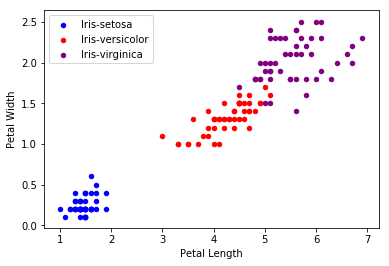

In [22]:
# Crie o gráfico solicitado

## Seu código aqui
import numpy as np
import matplotlib.pyplot as plt


data_ordem = df_resultado.sort_values(by="InfoGain")

ser_count_col = data_ordem['Atributo'].tolist()

flor1 = flores[flores["Species"]=="Iris-setosa"]
flor2 =  flores[flores["Species"]=="Iris-versicolor"]
flor3 =  flores[flores["Species"]=="Iris-virginica"]

plot = flor1.plot.scatter(x= ser_count_col[3], y=ser_count_col[2], color='Blue', label='Iris-setosa')
flor2.plot.scatter(x=ser_count_col[3], y=ser_count_col[2], color='Red', label='Iris-versicolor',ax=plot)
flor3.plot.scatter(x=ser_count_col[3], y=ser_count_col[2], color='Purple', label='Iris-virginica',ax=plot)

## Opcional: discretização dos atributos numéricos

Nesta versão de InfoGain, não discretizamos quando o valor é numérico. Não irá afetar significativamente a analise dessa prática. Porém, o correto seria discretizarmos cada atributo numérico. Caso queira, discretize, para isso: 

- Você deverá discretizar apenas atributos numéricos. Use a função is_numeric_dtype do módulo pandas.api.types (não esqueça de importar esse módulo)

- Altere o parametro 'bin' de value_counts na função ganho_informacao. [Veja a documentação](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.value_counts.html); 

- Você deverá alterar a forma que será filtrado os valores do ganho de informação. Para o filtro, use operadores logicos bitwise e verifique como funciona o objeto [Inteval](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Interval.html)

Após discretizar, reinicie o kernel e verifique o resultado da análise novamente.

## Informações sobre da Base de Dados (retirada do [Weka](https://www.cs.waikato.ac.nz/ml/weka/))

1. Title: Iris Plants Database
 
2. Sources:
      - (a) Creator: R.A. Fisher
      - (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
      - (c) Date: July, 1988

3. Past Usage:
    1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
       Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
       to Mathematical Statistics" (John Wiley, NY, 1950).
    2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
       (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
    3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
       Structure and Classification Rule for Recognition in Partially Exposed
       Environments".  IEEE Transactions on Pattern Analysis and Machine
       Intelligence, Vol. PAMI-2, No. 1, 67-71.
    4. Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE 
       Transactions on Information Theory, May 1972, 431-433.
    5. See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II
       conceptual clustering system finds 3 classes in the data.
 
4. Relevant Information:
        This is perhaps the best known database to be found in the pattern
        recognition literature.  Fisher's paper is a classic in the field
        and is referenced frequently to this day.  (See Duda & Hart, for
        example.)  The data set contains 3 classes of 50 instances each,
        where each class refers to a type of iris plant.  One class is
        linearly separable from the other 2; the latter are NOT linearly
        separable from each other.